# Complexité d'un algorithme, études expérimentales
## Comment évaluer la complexité temporelle de façon expérimentale ?

Il existe deux façons classiques d'__évaluer expérimentalement une complexité temporelle__ :

- __mesurer le temps d'exécution__ d'un algorithme, après l'avoir codé, en Python par exemple.
- __compter le nombre d'opérations élémentaires__ réellement effectuées lors d'une exécution de programme.

Le problème majeur de la première méthode, c'est qu'elle n'est pas stable. Elle est peu reproductible car elle dépend :

- du type de machine sur lequel tourne le programme (processeur, mémoire,..).
- du système d'exploitation (Linux, Windows, iOS,...)
- du nombre de processus en cours.
- d'autres paramètres plus fins et difficiles à gérer.

C'est pourquoi, les chercheurs en algorithmiques privilégient la seconde méthode, consistant à compter le nombre d'opérations élémentaires. On a déjà vu qu'on pouvait le faire de façon théorique, "sur papier". Nous allons maintenant le faire de façon plus automatisée.

## Comment compter le nombre d'opérations élémentaires ?

Implémenter des compteurs dans un programme une chose plutôt aisée. Les deux grandes difficultés de cet exercice sont :

- que doit-on compter ?
  - Les affectations ?
  - Les comparaisons ?
  - Les opérations arithmétiques ?
  - Les accès à la mémoire ?
  - Les entrées / sorties ?
  - Etc.
  - Il n'y a pas de répone définitive à cette question...
- où placer les compteurs exactement ?

De façon arbitraire, et pour simplifier un peu notre travail, __nous ne compterons que les comparaisons__ dans ce cours.

Nous considérerons que le nombre de comparaisons reflète la complexité temporelle de nos algorithmes et nous allons nous en servir pour comparer plusieurs algorithmes de tri.

## Comparaison de différents tris par décompte de...comparaisons !
### Tri par sélection

Voici un exemple de mise en place de compteurs pour décompter le nombre de comparaisons effectuées lors de l'exécution du programme :

In [ ]:
from random import randint    # uniquement nécessaire pour créer des tableaux de nombres aléatoires

def tri_selection(tab):
    """
    Fonction de tri sélection en place
    Renvoie le nombre de comparaisons effectuées
    
    Entrée : liste de nombres non trié
    
    Sortie : entier correspondant au nombre total de comparaisons effectuées
    """
    comparaisons = 0
    for i in range (len(tab)):
        mini = i
        for j in range (i + 1, len(tab)): # on commence à i+1 : inutile de comparer i à i !
            comparaisons += 1             # compter AVANT le if pour compter aussi les tests faux
            if tab[j] < tab[mini]:
                mini = j
        comparaisons += 1                 # compter AVANT le if pour compter aussi les tests faux
        if mini != i:
            tab[i], tab[mini] = tab[mini], tab[i]
    return comparaisons

taille_du_tableau = 10
tableau_a_trier = [randint(1, 10) for _ in range(taille_du_tableau)]
print(f"Ce tri par sélection a effectué {tri_selection(tableau_a_trier)} comparaisons pour trier\
 un tableau de {taille_du_tableau} éléments")

#### Bilan du tri par sélection

Exécuter plusieurs fois ce programme, en changeant parfois la taille du tableau puis noter vos remarques.

> __Remarques:__
- pour différents tableaux de même taille, le nombre de comparaisons est le même.
- un tableau de taille 10 demande environ 50 comparaisons.
- un tableau de taille 100 demande environ 5000 comparaisons.
- un tableau de taille 1000 demande environ 500000 comparaisons.
- un tableau de taille 10000 demande environ 50000000 comparaisons.
- on retrouve bien une complexité de classe O(n²) : un tableau 10 fois plus grand demande 100 fois plus de temps d'exécution !

### Tri par insertion

A vous de faire la même étude sur un tri par insertion.

__Savoir coder un tri par insertion est une compétence exigible en première__, il peut donc être futé de vérifier si vous savez le refaire assez rapidement ci-dessous. Sinon, copiez / collez ce code d'un précédent notebook (4_2_Les_tris), puis ajouter des compteurs de comparaisons.

In [ ]:
def tri_insertion(tab):
    """
    Fonction de tri par insertion en place
    Renvoie le nombre de comparaisons effectuées
    
    Entrée : liste de nombres non trié
    
    Sortie : entier correspondant au nombre total de comparaisons effectuées
    """
    comparaisons = 0
    for i in range(1, len(tab)):
        j = i - 1
        while j >= 0 and tab[j + 1] < tab[j]:
            if j >= 0:               # comparaisons du while
                comparaisons += 2    # 1 ou 2 comparaisons
            else:                    # en fonction du résultat de la première comparaison
                comparaisons += 1
            tab[j], tab[j + 1] = tab[j + 1], tab[j]
            j = j - 1
        if j >= 0 :             # on compte les dernières comparaisons du while,
            comparaisons += 2   # celles qui font sortir de la boucle
        else :
            comparaisons += 1
    return comparaisons

# on répète l'opération pour obtenir une valeur moyenne crédible
nombre_repetitions = 100
taille_du_tableau = 10
calcul_moyenne = 0
for _ in range (nombre_repetitions):
    tableau_a_trier = [randint(1, 10) for _ in range(taille_du_tableau)]
    calcul_moyenne += tri_insertion(tableau_a_trier)
print(f"Ce tri par insertion a effectué {round(calcul_moyenne / nombre_repetitions)} comparaisons pour trier\
 un tableau de {taille_du_tableau} éléments")

#### Bilan du tri par insertion

Exécuter plusieurs fois ce programme, en changeant parfois la taille du tableau puis noter vos remarques.

> __Remarques:__
- contrairement au tri par sélection, pour différents tableaux de même taille, le nombre de comparaisons n'est pas le même.
- un tableau de taille 10 demande environ 50 comparaisons.
- un tableau de taille 100 demande environ 5000 comparaisons.
- un tableau de taille 1000 demande environ 500000 comparaisons.
- pour des grands tableaux, on obtient un nombre de comparaisons un peu plus faible qu'avec le tri par sélection, mais l'ordre de grandeur est le même.
- on retrouve bien une complexité de classe O(n²) : un tableau 10 fois plus grand demande 100 fois plus de temps d'exécution !

## Tri rapide



In [ ]:

def partition(tab, debut, fin, pivot):
    """Fonction de partitionnement pour le Tri rapide
    Renvoie l'indice du nouveau pivot et le nombre de comparaisons effectuées
    """
    
    valeurPivot = tab[pivot]
    tab[pivot], tab[fin] = tab[fin], tab[pivot]
    pivot = debut
    comparaisons = 0
    for i in range(debut, fin):
        comparaisons += 1   # compter AVANT le if pour compter aussi les tests faux
        if tab[i] < valeurPivot:
            tab[i], tab[pivot] = tab[pivot], tab[i]
            pivot += 1
    tab[pivot], tab[fin] = tab[fin], tab[pivot]
    return pivot, comparaisons

def tri_rapide(tab, debut, fin):
    """Fonction récursive de tri rapide en place
    Nécessite la fonction partition
    Renvoie le nombre de comparaisons effectuées
    """
    
    comparaisons = 1    # compter AVANT le if pour compter aussi les tests faux
    if debut < fin:
        pivot = (debut + fin) // 2
        pivot, comparaisons_partition = partition(tab, debut, fin, pivot)
        comparaisons += comparaisons_partition
        comparaisons += tri_rapide(tab, debut, pivot - 1)
        comparaisons += tri_rapide(tab, pivot + 1, fin)
    return comparaisons

# on répète l'opération pour obtenir une valeur moyenne crédible
nombre_repetitions = 100
taille_du_tableau = 10
calcul_moyenne = 0
for _ in range (nombre_repetitions):
    tableau_a_trier = [randint(1, 10) for _ in range(taille_du_tableau)]
    calcul_moyenne +=tri_rapide(tableau_a_trier, 0, taille_du_tableau - 1)
print(f"Ce tri rapide a effectué {round(calcul_moyenne / nombre_repetitions)} comparaisons pour trier\
 un tableau de {taille_du_tableau} éléments")

#### Bilan du tri rapide

Exécuter plusieurs fois ce programme, en changeant parfois la taille du tableau puis noter vos remarques.

> __Remarques:__
- pour différents tableaux de même taille, le nombre de comparaisons n'est pas le même.
- un tableau de taille 10 demande environ 40 comparaisons. Ce qui est proche des deux premiers tris.
- un tableau de taille 100 demande environ 1000 comparaisons. Ce qui est 5 fois mieux que les deux premiers tris.
- un tableau de taille 1000 demande environ 50000 comparaisons. Ce qui est 10 fois mieux que les deux premiers tris.
- pour des grands tableaux, on obtient un gain important par rapport aux deux premiers tris.
- la complexité d'un tri rapide est de O(n.log(n)), ce qui est beaucoup plus efficace qu'une complexité O(n²).

## Tri fusion

In [ ]:
# FUSION (Algorithme trouvé sur https://interstices.info/les-algorithmes-de-tri/)

def fusion(tab, tempTab, debut, milieu, fin):
    '''
    Procédure de fusion pour le tri de fusion
    '''
    i = debut
    j = milieu + 1
    comparaisons = 0
    for k in range(debut, fin + 1):
        if j > fin:             # Décompte des comparaisons
            comparaisons += 1         # On tient compte du caractère séquentiel
        else:                   # des tests logiques effectués par Python
            if i <= milieu:     # Ex : si la première comparaison est Vraie
                comparaisons += 3     # les autres comparaisons ne seront pas testées
            else:               # car elle sont séparées par un OU
                comparaisons += 2
        if j > fin or (i <= milieu and tab[i] < tab[j]):
            tempTab[k] = tab[i]
            i += 1
        else:
            tempTab[k] = tab[j]
            j += 1
    for k in range(debut, fin + 1):
        tab[k] = tempTab[k]
    return comparaisons

def tri_fusion_recursif(tab, tempTab, debut, fin):
    '''
    Procédure récursive du tri de fusion qui partage le tableau en son milieu
    La procédure est ensuite rappelée pour trier chaque moitié
    '''
    comparaisons = 1
    if debut < fin:
        milieu = (debut + fin) // 2
        comparaisons += tri_fusion_recursif(tab, tempTab, debut, milieu)
        comparaisons += tri_fusion_recursif(tab, tempTab, milieu + 1, fin)
        comparaisons += fusion(tab, tempTab, debut, milieu, fin)
    return comparaisons

def tri_fusion(tab):
    '''
    Précédure de tri de fusion qui initialise un tableau temporaire
    puis appelle la procédure récursive de tri fusion
    '''
    tempTab = [None for _ in tab]
    return tri_fusion_recursif(tab, tempTab, 0, len(tab) - 1)

# on répète l'opération pour obtenir une valeur moyenne crédible
nombre_repetitions = 100
taille_du_tableau = 10
calcul_moyenne = 0
for _ in range (nombre_repetitions):
    tableau_a_trier = [randint(1, 10) for _ in range(taille_du_tableau)]
    calcul_moyenne +=tri_fusion(tableau_a_trier)
print(f"Ce tri fusion a effectué {round(calcul_moyenne / nombre_repetitions)} comparaisons pour trier\
 un tableau de {taille_du_tableau} éléments")

#### Bilan du tri fusion

Exécuter plusieurs fois ce programme, en changeant parfois la taille du tableau puis noter vos remarques.

> __Remarques:__
- un tableau de taille 10 demande environ 100 comparaisons. C'est le pire score de tous les tris testés ici !
- un tableau de taille 100 demande environ 2000 comparaisons. C'est moins bien que le tri rapide mais beaucoup mieux que les deux autres
- un tableau de taille 1000 demande environ 30000 comparaisons. A partir de là, le tri fusion est le plus efficace de tous !
- pour des petits tableaux, le tri fusion n'est absolument pas efficace.
- par contre, pour des grands tableaux, on obtient un gain important qui s'accroit avec la taille du tableau.
- la complexité d'un tri fusion est la même que celle du tri rapide : O(n.log(n)).

## Etude graphique de complexité temporelle

Pour cette étude graphique, le programme suivant utilise le module `matplotlib` qui permet simplement d'afficher des graphiques à partir de coordonnées stockées dans un tableau.

Le code suivant vous est fourni. Il vous sera, à minima, simplement demandé d'en analyser les résultats.

Mais rien ne vous empêche de le reproduire par vous même, en l'améliorant au besoin.

Tableau de 1405 éléments, trié par insertion avec 963643 comparaisons, en une durée de 187.5 millisecondes
Tableau de 1405 éléments, trié par sélection avec 987715 comparaisons, en une durée de 156.2 millisecondes
Tableau de 1405 éléments, trié par tri rapide avec 20999 comparaisons, en une durée de 0.0 millisecondes
Tableau de 1405 éléments, trié par tri de fusion avec 38529 comparaisons, en une durée de 15.6 millisecondes
Tableau de 1455 éléments, trié par insertion avec 1044574 comparaisons, en une durée de 203.1 millisecondes
Tableau de 1455 éléments, trié par sélection avec 1059240 comparaisons, en une durée de 93.8 millisecondes
Tableau de 1455 éléments, trié par tri rapide avec 22144 comparaisons, en une durée de 15.6 millisecondes
Tableau de 1455 éléments, trié par tri de fusion avec 40224 comparaisons, en une durée de 0.0 millisecondes
Tableau de 1505 éléments, trié par insertion avec 1138940 comparaisons, en une durée de 218.8 millisecondes
Tableau de 1505 éléments, trié par 

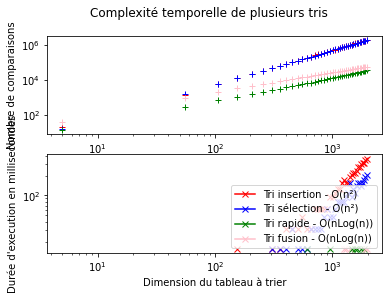

In [38]:
import time
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2)

taille_tab_mini = 5
taille_tab_max = 2000

tab_a_trier = [[randint(0, 100) for i in range(j)] for j in [dimension for dimension in range(taille_tab_mini, taille_tab_max, 50)]]

for tab in tab_a_trier:
    longueur_tableau = len(tab)
    tableaux_identiques = [tab for _ in range(4)] #Copie du tableau à trier car les procédures trient en place

    depart_chrono = time.process_time()
    nb_comparaisons_insertion = tri_insertion(tableaux_identiques[0])
    duree = (time.process_time() - depart_chrono) * 1000
    ax[0].plot(longueur_tableau, nb_comparaisons_insertion, color='red', marker = "+")
    ax[1].plot(longueur_tableau, duree, color='red', marker = "x")
    print(f'Tableau de {longueur_tableau} éléments, \
trié par insertion avec {nb_comparaisons_insertion} comparaisons, \
en une durée de {round(duree, 1)} millisecondes')

    depart_chrono = time.process_time()
    nb_comparaisons_selection = tri_selection(tableaux_identiques[1])
    duree = (time.process_time() - depart_chrono) * 1000
    ax[0].plot(longueur_tableau, nb_comparaisons_selection, color='blue', marker = "+")
    ax[1].plot(longueur_tableau, duree, color='blue', marker = "x")
    print(f'Tableau de {longueur_tableau} éléments, \
trié par sélection avec {nb_comparaisons_selection} comparaisons, \
en une durée de {round(duree, 1)} millisecondes')

    depart_chrono = time.process_time()
    nb_comparaisons_rapide = tri_rapide(tableaux_identiques[2], 0, longueur_tableau - 1)
    duree = (time.process_time() - depart_chrono) * 1000
    ax[0].plot(longueur_tableau, nb_comparaisons_rapide, color='green', marker = "+")
    ax[1].plot(longueur_tableau, duree, color='green', marker = "x")
    print(f'Tableau de {longueur_tableau} éléments, \
trié par tri rapide avec {nb_comparaisons_rapide} comparaisons, \
en une durée de {round(duree, 1)} millisecondes')

    depart_chrono = time.process_time()
    nb_comparaisons_fusion = tri_fusion(tableaux_identiques[3])
    duree = (time.process_time() - depart_chrono) * 1000
    ax[0].plot(longueur_tableau, nb_comparaisons_fusion, color='pink', marker = "+")
    ax[1].plot(longueur_tableau, duree, color='pink', marker = "x")
    print(f'Tableau de {longueur_tableau} éléments, \
trié par tri de fusion avec {nb_comparaisons_fusion} comparaisons, \
en une durée de {round(duree, 1)} millisecondes')

# Mise en forme des courbes

fig.suptitle('Complexité temporelle de plusieurs tris')
ax[1].set_xlabel('Dimension du tableau à trier')
ax[0].set_ylabel('Nombre de comparaisons')
ax[1].set_ylabel("Durée d'execution en millisecondes")
plt.legend(['Tri insertion - O(n²)', 'Tri sélection - O(n²)', 'Tri rapide - O(nLog(n))', 'Tri fusion - O(nLog(n))'], loc = 'lower right')
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
plt.show()

## Bilan de l'étude graphique

> __Remarque :__ il est possible que l'affichage des graphiques dans un notebook soit difficilement exploitable. De plus, le temps d'éxecution sur des grands tableaux étant élevé, en voici un résultat graphique sur un temps plus long :

![Complexité de tris](Complexite_de_tris.png)

Analyser ce graphique pour en tirer des informations et les noter ci-dessous.

> __commentaires :__
- cette échelle étant logarithmique, l'axe des ordonnée est très "tassée", il faut absolument en tenir compte dans l'analyse.
- on constate que __le nombre de comparaisons semble correlé avec le temps d'exécution de l'algorithme__. Toutefois, __cela nous rassure sur notre choix initial de ne compter que les comparaisons__ dans les algorithmes. Attention toutefois, ce n'est qu'une impression graphique et absolument pas une preuve !
- les tris par sélection et par insertion semblent d'une efficacité proche.
- les tris rapide et fusion semblent d'une efficacité proche.
- assez rapidement (pour des tailles de tableau de plusieurs centaines d'éléments) les tris de complexité O(n.log(n)) sont environ de 10 à 100 fois plus efficaces que ceux de complexité O(n²).

---
[![Licence CC BY NC SA](https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png "licence Creative Commons CC BY-NC-SA")](http://creativecommons.org/licenses/by-nc-sa/3.0/fr/)
<p style="text-align: center;">Auteur : David Landry, Lycée Clemenceau - Nantes</p>